**Note** : Le code Python doit être ignoré jusqu'au premier TP.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

np.set_printoptions(precision=3, linewidth=150, suppress=True)
plt.style.use(['seaborn-whitegrid','data/cours.mplstyle'])

In [2]:
def arrow2D(a,b, color='k', text="", **kargs):
    astyle = matplotlib.patches.ArrowStyle("simple", head_length=.8, head_width=.8, tail_width=.1)
    plt.plot([a[0],b[0]], [a[1],b[1]] ,visible = False) # to define the visible windows
    a,b = np.array(a), np.array(b)
    plt.annotate("", xytext=a, xy=b, 
                 arrowprops=dict(arrowstyle=astyle, shrinkA=0, shrinkB=0, aa=True, color=color, **kargs))
    direction = (b - a) / np.sqrt(np.square(b - a).sum())
    plt.text(*(b + 0.1 * direction), r"$\bf" + text + r"$", horizontalalignment='center', size=14)
    
def vector(v, color='k', text='', **kargs):
    arrow2D([0,0], v, color, text)

# Vecteur

Un vecteur est

* une flèche qui indique une direction et dont la longueur mesure une intensité (vision de physicien)
* un tableau avec 2 valeurs en 2D ou 3 en 3D (vision d'informaticien)
* un concept qui vérifie certaines propriétés (vision de mathématicien)

Dans le cadre de ce cours on se concentre sur les 2 premières visions et on ajoute

* un vecteur à son origine en (0,0)

D'un point de vue typographique les vecteurs sont notés avec une flèche $\vec v$ ou en gras $\bf v$. On utilisera cette dernière notation dans ce cours. Une fonction vectorielle (qui retourne un vecteur) est aussi notée comme un vecteur $\bf f(\,)$.

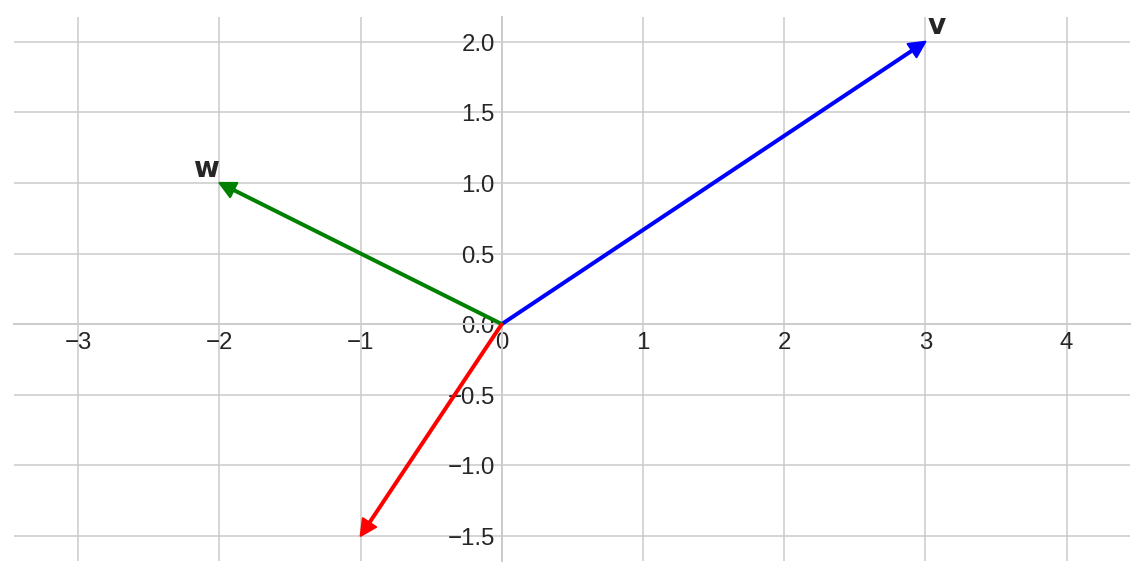

In [3]:
vector([3,2], 'b', "v")
vector([-2,1], 'g',  "w")
vector([-1,-1.5], 'r')
plt.gca().spines[:].set_position('zero')
plt.axis('equal');

Les opérations de base sur les vecteurs sont

* l'addition 
$$ \begin{bmatrix}
   v_1 \\
   v_2
   \end{bmatrix} 
   +
   \begin{bmatrix}
   w_1 \\
   w_2
   \end{bmatrix} 
   = 
   \begin{bmatrix}
   v_1 + w_1 \\
   v_2 + w_2
   \end{bmatrix} 
$$   
* la multiplication par un scalaire :
$$
   α \,
   \begin{bmatrix}
   w_1 \\
   w_2
   \end{bmatrix} 
   =
   \begin{bmatrix}
   α \, w_1 \\
   α \, w_2
   \end{bmatrix} 
$$

Bien sûr les vecteurs existent en 3D et en n'importe quelle dimension.

# Matrices et applications linéaires

Les matrices sont

* une représentation d'une application linéaire (vision de mathématicien)
* un tableau en 2D (vision d'informaticien qui n'a pas tout compris)
* un outil bien pratique pour faire plein de choses

Une application ou transformation ${\bf f}$ est dite linéaire si elle vérifie :

* ${\bf f(v)} + {\bf f(w)} = {\bf f(v + w)}$ 
* ${\bf f}(α \, {\bf v}) = α \, {\bf f(v)}$  avec  α un scalaire. 

Cela offre  2 propriétés :

* l'origine (0,0) reste en (0,0)
* toute ligne reste une ligne après sa transformation par une application linéaire.

Pour définir une application linéaire il suffit d'indiquer comment est transformée la base :

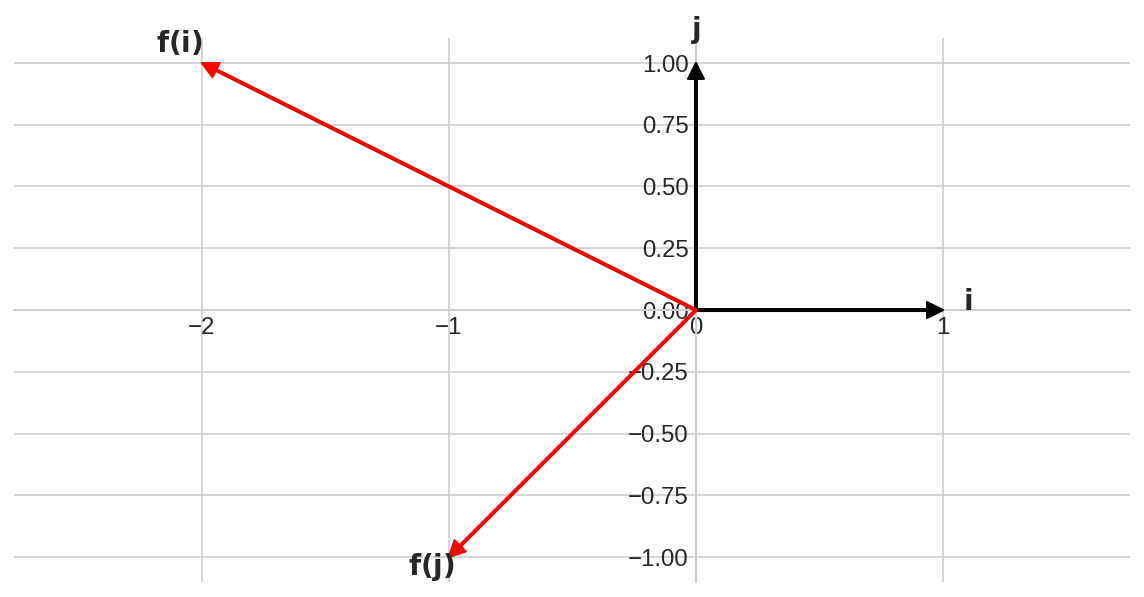

In [4]:
# base d'origine
vector([1,0], text='i')
vector([0,1], text='j')
# base transformée
vector([-2,1], 'r', 'f(i)')
vector([-1,-1], 'r', 'f(j)')
plt.gca().spines[:].set_position('zero')
plt.axis('equal');

Pour tout vecteur ${\bf v}$ on a 

$$ {\bf f(v)} = {\bf f}( v_1 \, {\bf i} + v_2 \, {\bf j}) = v_1 \, {\bf f(i)} + v_2 \, {\bf f(j)} $$

puisque $\bf f$ est linéraire. Cela montre bien qu'il suffit de connaitre la transformation de la base.

En déroulant les calculs on a dans le cas du graphique ci-dessus 

$$  
v_1 \, {\bf f(i)} + v_2 \, {\bf f(j)} = 
v_1 \,
\begin{bmatrix}
   -2 \\
   1
\end{bmatrix} 
+
v_2 \,
\begin{bmatrix}
   -1 \\
   -1
\end{bmatrix} 
=
\begin{bmatrix}
   -2 \, v_1 \\
   1 \, v_1 
\end{bmatrix} 
+
\begin{bmatrix}
   -1 \, v2\\
   -1 \, v2
\end{bmatrix} 
=
\begin{bmatrix}
   -2 \, v_1 -1 \, v2\\
   1 \, v_1    -1 \, v2
\end{bmatrix} 
=
\begin{bmatrix}
   -2  & -1 \\
   1   &  -1
\end{bmatrix} 
\,
\begin{bmatrix}
   v_1 \\
   v_2
\end{bmatrix} 
$$

On introduit ainsi la matrice et le produit matriciel. 

L'application linéaire $\bf f$ de notre graphique peut donc être représentée par une opération matricielle : ${\bf f}({\bf v}) =  A \, {\bf v}$ où la matrice A est

$$
A =
\begin{bmatrix}
   -2  & -1 \\
   1   &  -1
\end{bmatrix} 
$$

On remarque que l'on trouve $\bf f(i)$ dans la première colonne et $\bf f(j)$ dans la seconde colonne.

On pourra vérifier en exercice que l'application ${\bf f} : {\bf v} \mapsto A \, {\bf v}$ est bien linéaire.

## Déterminant d'une matrice

Le déterminant indique l'agrandissement la surface d'un objet après transformation par $\bf f$ ou, ce qui est pareil, après multiplication par A.

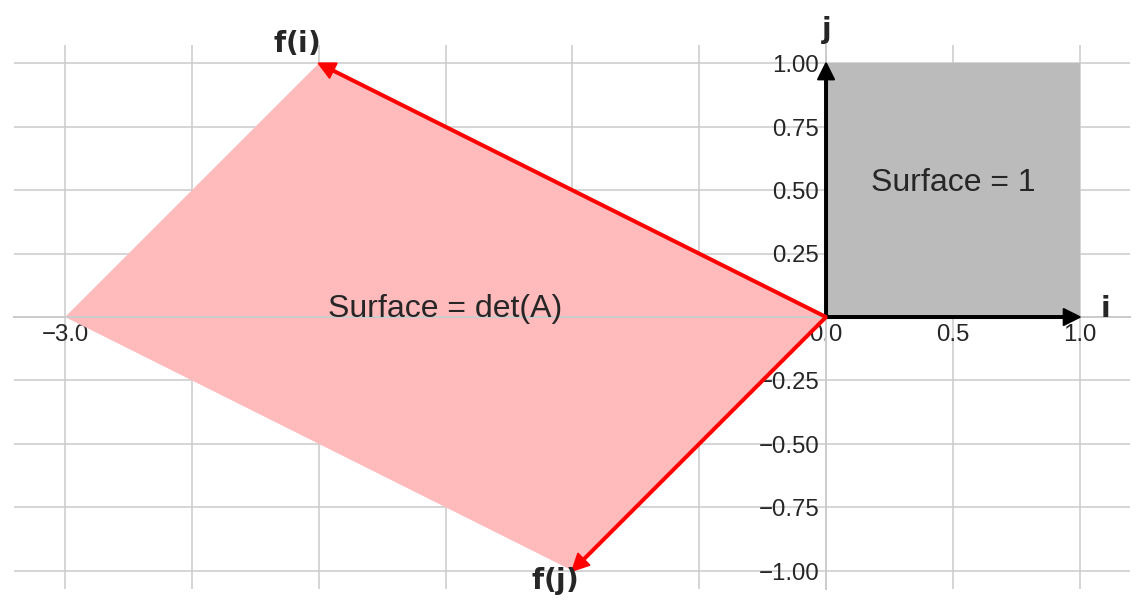

In [5]:
# base d'origine
vector([1,0], text='i')
vector([0,1], text='j')
plt.fill([0,1, 1, 0],[0,0,1,1], '#bbbbbb')
plt.text(0.5, 0.5, 'Surface = 1', horizontalalignment='center', size=16)
# base transformée
vector([-2,1], 'r', 'f(i)')
vector([-1,-1], 'r', 'f(j)')
plt.fill([0,-2, -3, -1],[0,1,0,-1], '#ffbbbb')
plt.text(-1.5, 0, 'Surface = det(A)', horizontalalignment='center', size=16)
plt.gca().spines[:].set_position('zero')
plt.axis('equal');

In [6]:
import numpy.linalg as lin

A = np.array([[-2, -1], [1, -1]])
lin.det(A)

3.0

* si det(A) = 0 alors cela veut dire que  $\bf f(i)$ et $\bf f(j)$ sont colinéaires, donc qu'on a perdu une dimension (on regarde la tranche du plan).
* si det(A) < 0 alors cela veut dire que  $\bf f(i)$ est après $\bf f(j)$ dans le sens trigonométrique (on a retourné le plan)

Si vous n'êtes pas à l'aise avec l'algèbre linéaire, je vous invite à regader [les vidéos de 3 bleus, 1 marron](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab).

## Normes

### Norme d'un vecteur

Il existe différentes normes, la plus connue étant la norme euclidienne ou la norme 2. Sa définition est :

$$
|| {\bf v} ||_2 = \sqrt{\sum_{i=1}^n v_i^2} = \sqrt{\bf v . \bf v}
$$

On a aussi la norme 1 (dites aussi Manhattan) :

$$
||{\bf v}||_1 = \sum_{i=1}^n |v_i|
$$

La norme n :

$$
|| {\bf v} ||_n = \left( {\sum_{i=1}^n v_i^n} \right)^{1/n}
$$

et donc la la norme infinie est le max (il faut utiliser les limites pour comprendre pourquoi).

In [7]:
v = np.array([0.1, 1, 4, 10, 50])
print("v      =", v)
print("v¹⁰⁰   =", v**100)
print("Σ v¹⁰⁰ =", (v**100).sum())
print("ǁvǁ₁₀₀ =", (v**100).sum()**0.01)

v      = [ 0.1  1.   4.  10.  50. ]
v¹⁰⁰   = [1.000e-100 1.000e+000 1.607e+060 1.000e+100 7.889e+169]
Σ v¹⁰⁰ = 7.888609052210118e+169
ǁvǁ₁₀₀ = 50.00000000000001


### Norme d'une matrice

La norme qui dérive du produit scalaire est la **norme de Frobenius** :

$$
|| A ||_F = \sqrt{\textrm{trace}(A A^*)} = \sqrt{ \sum_{1 \le i\le m \atop 1 \le j\le n}|A_{ij}|^2 }
$$

avec $A^*$ la matrice adjointe (ou la matrice transposé si on est dans R).


In [8]:
A = np.array([[1, 1], [2, 3]])
print(A)
print("ǁAǁ = ", np.linalg.norm(A))

[[1 1]
 [2 3]]
ǁAǁ =  3.872983346207417


La **norme subordonnée** est induite par la norme vectorielle :

$$
||B||_n = \sup_{\bf v} \frac{||B\, {\bf v}||_n}{||\textbf{v}||_n} = \sup_{\textbf{v} \, t.q. ||\textbf{v}||_n = 1} ||B\, {\bf v}||_n = \sup_{\textbf{v} \, t.q. ||\textbf{v}||_n \le 1} ||B\, {\bf v}||_n
$$

C'est la norme qu'on utilise par défaut dans ce cours.

In [9]:
print("ǁAǁ₂ = ", np.linalg.norm(A,2))

ǁAǁ₂ =  3.8643284505408246


### Propriétés

Dans notre cas où l'espace d'arrivée et l'espace de départ sont $\mathbb{R}^n$ ou $\mathbb{C}^n$, ces
normes ont les propriétés suivantes :
    
$$
\begin{array}{l}
|| A B || \le ||A|| \; ||B|| \\
|| A {\bf v} || \le ||A|| \; ||{\bf v}||
\end{array}
$$